In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from neural_exploration import *
sns.set()

### Bandit settings

In [3]:
T = int(1e3)
n_arms = 4
n_features = 20
noise_std = 0.1

confidence_scaling_factor = noise_std

n_sim = 3

SEED = 42
np.random.seed(SEED)

### LinUCB on linear rewards - h1

In [4]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 10*np.dot(a, x)

In [5]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, seed=SEED)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = LinUCB(bandit,
                   reg_factor=1.0,
                   delta=0.1,
                   confidence_scaling_factor=confidence_scaling_factor,
                  )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 1997.15it/s, total regret=106, % optimal arm=90.01%]


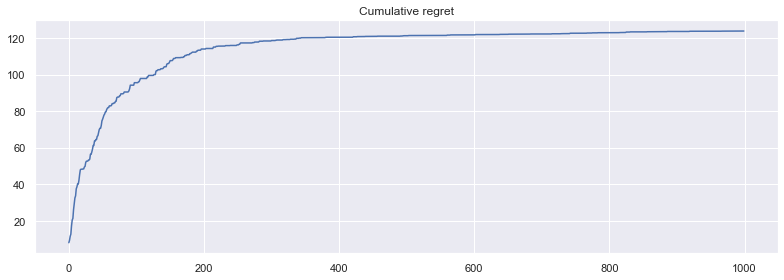

In [6]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(mean_regrets)
#ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

#fig.savefig('figures/linucb_linear.pdf')

### LinUCB on nonlinear rewards - h2

In [7]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 100*np.dot(a, x)**2

In [8]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, seed=SEED)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = LinUCB(bandit,
                   reg_factor=1.0,
                   delta=0.1,
                   confidence_scaling_factor=confidence_scaling_factor,
                  )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|████████████████████████████████| 1000/1000 [00:00<00:00, 2531.47it/s, total regret=5.04e+3, % optimal arm=36.51%]


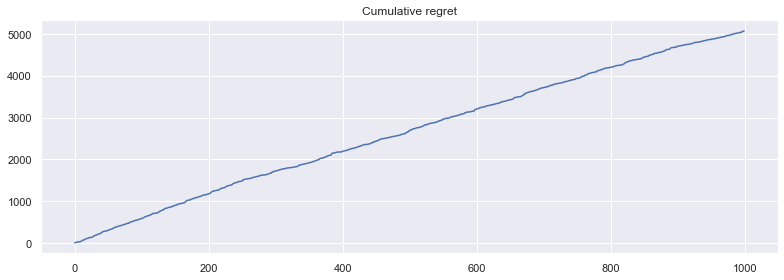

In [9]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(mean_regrets)
#ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

#fig.savefig('figures/linucb_quad.pdf')

In [10]:
### LinUCB on nonlinear rewards - h3

In [11]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: np.cos(10*np.pi*np.dot(x, a))

In [12]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, seed=SEED)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = LinUCB(bandit,
                   reg_factor=1.0,
                   delta=0.1,
                   confidence_scaling_factor=confidence_scaling_factor,
                  )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 2272.01it/s, total regret=680, % optimal arm=25.08%]


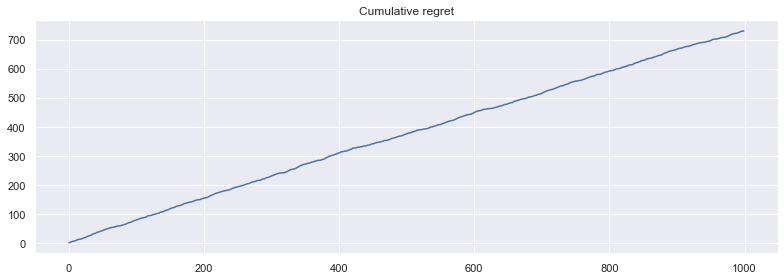

In [13]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(mean_regrets)
#ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

#fig.savefig('figures/linucb_cosine.pdf')